# Well, Well Wellness Aps :
A comparative analysis of top 5 grossing health/wellness apps - customer clustering and sentiment analysis using NLP to develop language descriptors for best and worst app reviews to inform what is going well and what could be improved in the world of wellness apps. 

# Obtain:

Inspired by: https://www.curiousily.com/posts/create-dataset-for-sentiment-analysis-by-scraping-google-play-app-reviews-using-python/ SEVERAL copies of this same project exist in various formats by various authors.

going to App Annie and looking at top grossing wellness apps:
https://www.appannie.com/apps/google-play/top-chart/?country=US&category=19&device=&date=2020-04-05&feed=All&rank_sorting_type=rank&page_number=0&page_size=100&table_selections=

In [2]:
#!pip install google_play_scraper

In [2]:
import json
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter
from google_play_scraper import Sort, reviews, app
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

## Top 5 Wellness Apps:

According to [appannie](https://www.appannie.com/apps/google-play/top-chart/?country=US&category=19&device=&date=2020-04-05&feed=All&rank_sorting_type=rank&page_number=0&page_size=100&table_selections=), the top five grossing wellness apps on July 1 for the google play store in order:

1. Calm
* MyFitnessPal
* Headspace
* Me
* Fitbit

Rankings change daily.

Data on each package was obtained using [google play scraper](https://pypi.org/project/google-play-scraper/). Overviews of each app can be observed below:

In [3]:
#creating a list of top apps based on their google play app id

app_packages = [
    'com.calm.android',
    'com.myfitnesspal.android',
    'com.getsomeheadspace.android', 
    'com.gen.workoutme',
    'com.fitbit.FitbitMobile'
]

In [4]:
#obtaining information on each app and descriptive history using google_play_scraper api
app_infos = []

for ap in tqdm(app_packages):
    info = app(ap, lang='en', country='us')
    del info['comments']
    app_infos.append(info)

100%|██████████| 5/5 [00:04<00:00,  1.04it/s]


In [5]:
app_infos_df = pd.DataFrame.from_records(app_infos)


In [221]:
#app_infos_df.to_csv('app_infos_71020')
#saved file since every download grabs different data

##  App Descriptions and Summaries below:

In [6]:
app_infos_df

title  \
0   Calm - Meditate, Sleep, Relax   
1  Calorie Counter - MyFitnessPal   
2   Headspace: Meditation & Sleep   
3  BetterMe: Home Workouts & Diet   
4                          Fitbit   

                                         description  \
0  Calm is a leading app for meditation and sleep...   
1  Whether you want to lose weight, tone up, get ...   
2  Learn the life-changing skills of meditation i...   
3  BetterMe: Home Workouts & Diet To Lose Weight ...   
4  Start a free 90-day trial of Fitbit Premium fo...   

                                     descriptionHTML  \
0  Calm is a leading app for meditation and sleep...   
1  Whether you want to lose weight, tone up, get ...   
2  Learn the life-changing skills of meditation i...   
3  BetterMe: Home Workouts &amp; Diet To Lose Wei...   
4  Start a free 90-day trial of Fitbit Premium fo...   

                                             summary  \
0  Join the millions discovering the life-changin...   
1  Lose weight with MyFitnessPal, the easiest cal...   
2  Meditation and mindfulness in just a few minut...   
3  Weight Loss Workout: Abs, Butt, Legs and Whole...   
4  Fitbit is dedicated to helping people lead hea...   

                                         summaryHTML     installs  \
0  Join the millions discovering the life-changin...  10,000,000+   
1  Lose weight with MyFitnessPal, the easiest cal...  50,000,000+   
2  Meditation and mindfulness in just a few minut...  10,000,000+   
3  Weight Loss Workout: Abs, Butt, Legs and Whole...  10,000,000+   
4  Fitbit is dedicated to helping people lead hea...  50,000,000+   

   minInstalls     score  ratings  reviews  ... contentRatingDescription  \
0     10000000  4.395254   268946    91112  ...                     None   
1     50000000  4.445467  2303564   806548  ...                     None   
2     10000000  3.459488   133507    54214  ...                     None   
3     10000000  4.203961    76666    29489  ...                     None   
4     50000000  3.752197   667317   305342  ...                     None   

   adSupported  containsAds      released     updated             version  \
0         None         None  Jul 30, 2014  1594106391  Varies with device   
1         True         True  Apr 26, 2010  1594139530  Varies with device   
2         None         None   Jan 6, 2012  1594320031               4.2.1   
3         None         None  Jul 27, 2017  1594311199               3.9.0   
4         None         None  Mar 16, 2012  1594060323  Varies with device   

                                       recentChanges  \
0  As always, you can expect an original Daily Ca...   
1  Whether you want to log your lowest weight in ...   
2  The latest release features a fresh all-new lo...   
3            Bug fixes and performance improvements.   
4            *Bug fixes and performance improvements   

                                   recentChangesHTML  \
0  As always, you can expect an original Daily Ca...   
1  Whether you want to log your lowest weight in ...   
2  The latest release features a fresh all-new lo...   
3            Bug fixes and performance improvements.   
4            *Bug fixes and performance improvements   

                          appId  \
0              com.calm.android   
1      com.myfitnesspal.android   
2  com.getsomeheadspace.android   
3             com.gen.workoutme   
4       com.fitbit.FitbitMobile   

                                                 url  
0  https://play.google.com/store/apps/details?id=...  
1  https://play.google.com/store/apps/details?id=...  
2  https://play.google.com/store/apps/details?id=...  
3  https://play.google.com/store/apps/details?id=...  
4  https://play.google.com/store/apps/details?id=...  

[5 rows x 47 columns]

A helper function from the inspiration project to read .json files: 

In [7]:
def print_json(json_object):
    json_str = json.dumps(
        json_object,
        indent=2,
        sort_keys=True,
        default=str)
    #cool feature to help highlight specificied string
    print(highlight(json_str, JsonLexer(), TerminalFormatter()))

In [8]:
print_json(app_infos[4])

{
  "adSupported": null,
  "androidVersion": "Varies",
  "androidVersionText": "Varies with device",
  "appId": "com.fitbit.FitbitMobile",
  "containsAds": null,
  "contentRating": "Everyone",
  "contentRatingDescription": null,
  "currency": "USD",
  "description": "Start a free 90-day trial of Fitbit Premium for personalized guidance, customized health programs and 240+ video workouts you can do at home. \r\n\r\nSay hello to one of the world\u2019s leading apps for health and fitness. Use the Fitbit app on it\u2019s own to join our community, track basic stats and stay motivated on your journey. Or, get a Fitbit tracker or smartwatch to see how your activity, workouts, sleep, nutrition and stress all fit together. Either way, you\u2019ll find the information and inspiration you need to reach your goals\u2014all in one place. \r\n\r\nA free app that tracks your day & progress over time\r\nFind free workouts, nutrition programs, meditation tracks, sleep tools & more \r\nConnect with fr

  "descriptionHTML": "Start a free 90-day trial of Fitbit Premium for personalized guidance, customized health programs and 240+ video workouts you can do at home. <br><br>Say hello to one of the world\u2019s leading apps for health and fitness. Use the Fitbit app on it\u2019s own to join our community, track basic stats and stay motivated on your journey. Or, get a Fitbit tracker or smartwatch to see how your activity, workouts, sleep, nutrition and stress all fit together. Either way, you\u2019ll find the information and inspiration you need to reach your goals\u2014all in one place. <br><br>A free app that tracks your day &amp; progress over time<br>Find free workouts, nutrition programs, meditation tracks, sleep tools &amp; more <br>Connect with friends, start challenges &amp; join an inspiring community<br>Set goals, earn achievement badges &amp; celebrate milestones<br>Automatically sync your data to 3,000+ popular partner apps<br>Access innovative smartwatch apps &amp; fresh clo

In [9]:
app_packages[0]

'com.calm.android'

### logos:

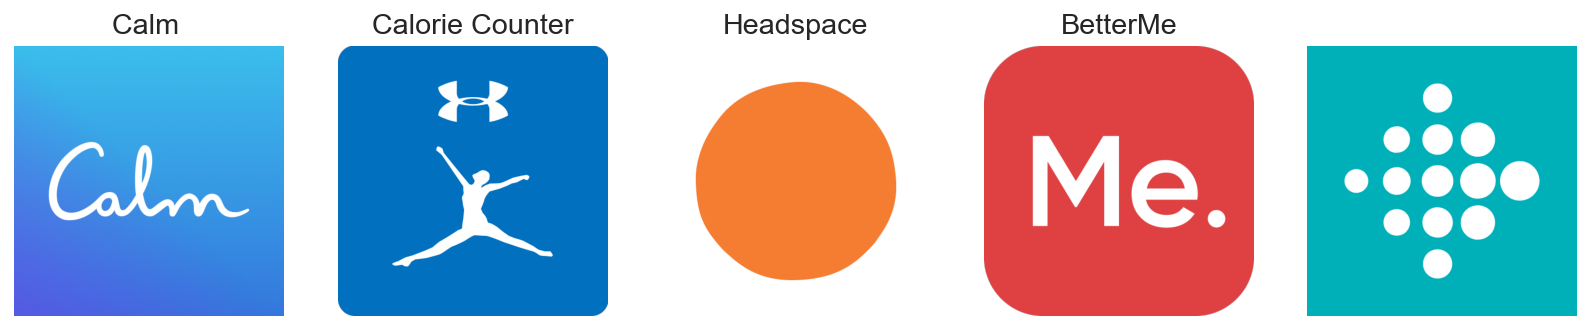

In [10]:
def format_title(title):
    sep_index = title.find(':') if title.find(':') != -1 else title.find('-')
    if sep_index != -1:
        title = title[:sep_index]
        return title[:15]
fig, axs = plt.subplots(1,5,figsize=(14, 5))

for i, ax in enumerate(axs.flat):
    ai = app_infos[i]
    img = plt.imread(ai['icon'])
    ax.imshow(img)
    ax.set_title(format_title(ai['title']))
    ax.axis('off')

### Obtaining app reviews:

In [11]:
help(reviews)

Help on function reviews in module google_play_scraper.features.reviews:

reviews(app_id, lang=None, country=None, sort=None, count=None, filter_score_with=None, continuation_token=None)



In [12]:
#looking at reviews function and learning...
calm, continuation_token = reviews('com.calm.android', lang='en', country='us',sort=Sort.MOST_RELEVANT, count=3)
calm

[{'reviewId': 'gp:AOqpTOEVrkdHF8x6kk7t7rESpoSzsk2yY3I5b19zS_Pla_IqU1Xou-RAphhSoikf9D0V0yoRFaIYwYsGy9JRaQ',
  'userName': 'Nathan T.',
  'userImage': 'https://lh3.googleusercontent.com/-_gIxpXuntNI/AAAAAAAAAAI/AAAAAAAAAAA/AMZuucmI0s67Has6CCIjJHPJDHdthC_lJQ/photo.jpg',
  'content': "Not sure why the low reviews. But this is a really good all around app. It's not entirely focused on meditation, but it is good for it. It's also focused on sleep with sleep stories and music, which is what I use it for. I think the meditation lessons are a bit more difficult for beginners than Headspace, so that's where Headspace gets the +1. But I love that for the same price, you get these other sleep sounds and music",
  'score': 5,
  'thumbsUpCount': 58,
  'reviewCreatedVersion': '4.29',
  'at': datetime.datetime(2020, 7, 7, 21, 5, 20),
  'replyContent': None,
  'repliedAt': None},
 {'reviewId': 'gp:AOqpTOF0bECk3ndWQSA92hRJJtPPixUf_RP7Zz41RJbVLRXZyZKa8pGohG6SaSUQMbZIDPmwgAeJHNnw22RgKA',
  'userName': "Sa

saving for api usage: 
https://github.com/JoMingyu/google-play-scraper

better than this one: 
https://github.com/facundoolano/google-play-scraper#reviews


In [13]:
#iterating through each of the app packages to grab reviews on each grabbing 10K each based on relevance
results = []
for ap in tqdm(app_packages):
    result, continuation_token = reviews(
    ap,
    lang='en', # defaults to 'en'
    country='us', # defaults to 'us'
    sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT SQL-like calls
    count = 10000, # defaults to 100, returns number of records you want
    filter_score_with=None) # defaults to None(means all score) might be usefull to scrape some more low scores if needed
    
    for a in result:
        a['application'] = ap #tracking which app we grabbed review of
        
    results.extend(result)

100%|██████████| 5/5 [04:46<00:00, 57.26s/it]


In [14]:
len(results)

50000

In [15]:
#creating files to work from and .csv if needed
app_reviews_df = pd.DataFrame(results)
app_reviews_df.to_csv('reviews.csv', index=None, header=True)

## Data Description

|**Field**  | **Description**|
|--|--|
|ReviewId | a unique identifier for each review|
|userName  | Name of user that reviewed the product|
|userImage | User avatar??? (need to explore)|
|content | The text supporting the stars assigned at the review|
|thumbsUpCount | count of how many other users appreciated the review (helps for relevance)|
|reviewCreatedVersion | The version of the app being reviewed|
|at | the review date
|replyContent | Text/content if there is a reply to a review from the app administrators|
|repliedAt | Timestamp for the replyContent field
|application| the app being reviewed


In [16]:
app_reviews_df.head()

reviewId       userName  \
0  gp:AOqpTOEVrkdHF8x6kk7t7rESpoSzsk2yY3I5b19zS_P...      Nathan T.   
1  gp:AOqpTOF0bECk3ndWQSA92hRJJtPPixUf_RP7Zz41RJb...  Sarah O'Brien   
2  gp:AOqpTOHUTVcw-ouWoorI96L8XfZuk8LQk7BwgyOkyKM...   crissy verce   
3  gp:AOqpTOFuuTaHyzeTDn_OMc8aJdsIwGiQ2O7zB-f7I-u...      Glenneroo   
4  gp:AOqpTOFbTv-3J6vW6KUJs9ojQWrMJphxiBUpTtx6l8N...            E A   

                                           userImage  \
0  https://lh3.googleusercontent.com/-_gIxpXuntNI...   
1  https://lh3.googleusercontent.com/-z7GRy79xifU...   
2  https://lh3.googleusercontent.com/-f4i3Mx6-zBo...   
3  https://lh3.googleusercontent.com/a-/AOh14GgIF...   
4  https://lh3.googleusercontent.com/-h34wPvn-8aQ...   

                                             content  score  thumbsUpCount  \
0  Not sure why the low reviews. But this is a re...      5             58   
1  I signed up for the yearly service, which was ...      1            315   
2  This app is actually causing more stress. I've...      1             70   
3  Can't even try the app without creating a logi...      1             11   
4  I love this app, but what I don't love is the ...      1              0   

  reviewCreatedVersion                  at replyContent repliedAt  \
0                 4.29 2020-07-07 21:05:20         None       NaT   
1                 4.29 2020-07-06 20:35:19         None       NaT   
2                 4.29 2020-07-08 00:27:42         None       NaT   
3                 4.29 2020-07-07 19:32:31         None       NaT   
4                 4.29 2020-07-09 04:48:11         None       NaT   

        application  
0  com.calm.android  
1  com.calm.android  
2  com.calm.android  
3  com.calm.android  
4  com.calm.android

# Scrub / Clean

#### observation: good to see not as imbalanced as in cases past.  :-P  'will need to look into missing data.

In [17]:
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
reviewId                50000 non-null object
userName                50000 non-null object
userImage               50000 non-null object
content                 50000 non-null object
score                   50000 non-null int64
thumbsUpCount           50000 non-null int64
reviewCreatedVersion    45298 non-null object
at                      50000 non-null datetime64[ns]
replyContent            19508 non-null object
repliedAt               19508 non-null datetime64[ns]
application             50000 non-null object
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 4.2+ MB


### Missing Data:

In [55]:
import missingno as msno

In [ ]:
msno.bar(app_reviews_df.sample(1000))

In [18]:
#reviewCreatedVersion is almost 10% of the data... for now 'am going to fill in with a . to keep the data numeric'
#just want to preview the data to make sure there are no obvious patterns in them... 
missingvers = app_reviews_df.loc[app_reviews_df['reviewCreatedVersion'].isna()]
missingvers.head()

reviewId        userName  \
3869  gp:AOqpTOHHzVfRFFx02_pboUPgl9auLUiPOjcRtTfQXWk...     Boat Smitty   
3897  gp:AOqpTOH1fNkpwyGGdI7nsB2Lp3oM7BSHtyGy66_WrW_...       Riru Isla   
3898  gp:AOqpTOFsITLloZrPfhSYK_A9s5dmo2VegsxXKhVo7uQ...   Niall Goddard   
3900  gp:AOqpTOE8Eb6zN0PndR2BzsNiX8Eom3fZsVgwjpRZ9kd...  Brazil Uluwita   
3909  gp:AOqpTOG1tmYDVVVvP7SaL9Q0PWG_ygEwpzGShKTeJHW...      Meagan Lai   

                                              userImage  \
3869  https://lh3.googleusercontent.com/a-/AOh14GgYD...   
3897  https://lh3.googleusercontent.com/a-/AOh14GhI0...   
3898  https://lh3.googleusercontent.com/a-/AOh14Gg9H...   
3900  https://lh3.googleusercontent.com/a-/AOh14GiiV...   
3909  https://lh3.googleusercontent.com/-__XjWddWJNI...   

                                                content  score  thumbsUpCount  \
3869  I struggle with anxiety and depression (as man...      5              0   
3897  The idea is great, but don't let the Facebook ...      2              0   
3898  Well, it's a big shame. This app looked really...      1              0   
3900  I downloaded this application and immediately ...      1              0   
3909  Won't let me cancel subscription. I signed up ...      1              0   

     reviewCreatedVersion                  at replyContent repliedAt  \
3869                 None 2020-06-21 10:52:55         None       NaT   
3897                 None 2020-06-16 21:19:43         None       NaT   
3898                 None 2020-06-29 09:39:59         None       NaT   
3900                 None 2020-07-09 08:59:47         None       NaT   
3909                 None 2020-06-22 21:37:51         None       NaT   

           application  
3869  com.calm.android  
3897  com.calm.android  
3898  com.calm.android  
3900  com.calm.android  
3909  com.calm.android

In [24]:
app_reviews_df['reviewCreatedVersion'].fillna('.', inplace=True)

In [21]:
#creating a field to indicate whether or not someone replied to a review
app_reviews_df['replied'] = app_reviews_df['replyContent'].notnull()
app_reviews_df['replied'].value_counts()

In [28]:
app_reviews_df['replyContent'].fillna('n/a', inplace=True)
app_reviews_df['repliedAt'].fillna('_', inplace=True)

In [29]:
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
reviewId                50000 non-null object
userName                50000 non-null object
userImage               50000 non-null object
content                 50000 non-null object
score                   50000 non-null int64
thumbsUpCount           50000 non-null int64
reviewCreatedVersion    50000 non-null object
at                      50000 non-null datetime64[ns]
replyContent            50000 non-null object
repliedAt               50000 non-null object
application             50000 non-null object
replied                 50000 non-null bool
dtypes: bool(1), datetime64[ns](1), int64(2), object(8)
memory usage: 4.2+ MB


In [32]:
#there are no reviewIds that are duplicated, see no value so dropping
app_reviews_df['reviewId'].duplicated().value_counts()

False    50000
Name: reviewId, dtype: int64

In [41]:
app_reviews_df.drop('reviewId', axis=1, inplace=True)

KeyError: "['reviewId'] not found in axis"

In [46]:
app_reviews_df['userImage'][8]
#not focus of this project so dropping images
app_reviews_df.drop('userImage', axis=1, inplace=True)

In [47]:
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
userName                50000 non-null object
content                 50000 non-null object
score                   50000 non-null int64
thumbsUpCount           50000 non-null int64
reviewCreatedVersion    50000 non-null object
at                      50000 non-null datetime64[ns]
replyContent            50000 non-null object
repliedAt               50000 non-null object
application             50000 non-null object
replied                 50000 non-null bool
dtypes: bool(1), datetime64[ns](1), int64(2), object(6)
memory usage: 3.5+ MB


## A first look at the data: Ratings Across Apps

Text(0, 0.5, 'Count')

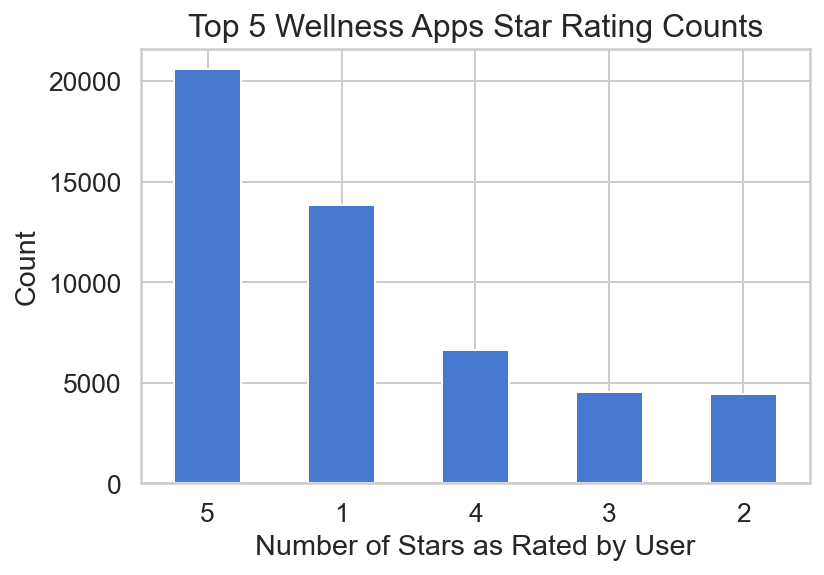

In [48]:
#counting how many reviews fall into each category
app_reviews_df['score'].value_counts().plot(kind='bar')
plt.title('Top 5 Wellness Apps Star Rating Counts', fontsize=16)
plt.xlabel('Number of Stars as Rated by User')
plt.xticks(rotation=0) 
plt.ylabel('Count')

Obervation: Top and bottom ratings are the most frequently occuring accross all 5 apps which could explain why they make the most $$

In [49]:
app_reviews_df['application'].value_counts()

com.getsomeheadspace.android    10000
com.gen.workoutme               10000
com.fitbit.FitbitMobile         10000
com.calm.android                10000
com.myfitnesspal.android        10000
Name: application, dtype: int64

In [50]:
calm_df = app_reviews_df[app_reviews_df['application'] == 'com.calm.android']
fitpal_df = app_reviews_df[app_reviews_df['application'] == 'com.myfitnesspal.android']
me_df = app_reviews_df[app_reviews_df['application'] == 'com.gen.workoutme']
headspace_df = app_reviews_df[app_reviews_df['application'] == 'com.getsomeheadspace.android']
fitbit_df = app_reviews_df[app_reviews_df['application'] == 'com.fitbit.FitbitMobile']

In [51]:
app_reviews_df.head()

userName                                            content  score  \
0      Nathan T.  Not sure why the low reviews. But this is a re...      5   
1  Sarah O'Brien  I signed up for the yearly service, which was ...      1   
2   crissy verce  This app is actually causing more stress. I've...      1   
3      Glenneroo  Can't even try the app without creating a logi...      1   
4            E A  I love this app, but what I don't love is the ...      1   

   thumbsUpCount reviewCreatedVersion                  at replyContent  \
0             58                 4.29 2020-07-07 21:05:20          n/a   
1            315                 4.29 2020-07-06 20:35:19          n/a   
2             70                 4.29 2020-07-08 00:27:42          n/a   
3             11                 4.29 2020-07-07 19:32:31          n/a   
4              0                 4.29 2020-07-09 04:48:11          n/a   

  repliedAt       application  replied  
0         _  com.calm.android    False  
1         _  com.calm.android    False  
2         _  com.calm.android    False  
3         _  com.calm.android    False  
4         _  com.calm.android    False

### Squeaky wheels get the grease.  Looking into how often a repeat reviewer gets replied to.

In [52]:
repeat_comments = app_reviews_df[app_reviews_df.duplicated(['userName','application'], keep=False)].sort_values('userName')
print(f'The set of repeat reviewers is {len(repeat_comments)} rows.')
av_score = round(repeat_comments['score'].mean(),1)
print(f'The average score of repeat reviers is {av_score}')
repeat_comments


The set of repeat reviewers is 1802 rows.
The average score of repeat reviers is 3.5


userName                                            content  \
28740            A D  Disappointed with the direction this app is he...   
27400            A D  Impossible to download anything for offline us...   
20978            A D  Shuts down, over priced confusing subscription...   
27202  A Google user  Very good helps me get to sleep at night, I pu...   
29714  A Google user  I have really bad anxiety and someone suggeste...   
...              ...                                                ...   
23522            h k  Hey guys, first of all, I adore this app like ...   
29742              m  It won't even let me sign up for the app. Ever...   
24458              m  Most annoying ads of your app always show up i...   
42040            sal  great app, only one thing that needs sorting w...   
48639            sal  What a load of rubbish. this app use to update...   

       score  thumbsUpCount reviewCreatedVersion                  at  \
28740      1              1                3.6.7 2018-09-15 17:48:10   
27400      1              0               3.27.0 2019-07-18 00:29:59   
20978      1              0               3.57.0 2020-06-17 23:31:05   
27202      5              0                3.7.0 2018-09-27 14:35:38   
29714      5              2                3.8.4 2018-11-20 08:19:59   
...      ...            ...                  ...                 ...   
23522      5              1               3.35.0 2019-10-05 02:33:54   
29742      1              2               3.44.2 2019-12-01 13:31:07   
24458      1             11                3.7.0 2018-09-21 16:14:21   
42040      5              1               3.22.1 2020-06-09 00:33:27   
48639      1              1                 3.18 2020-04-06 00:15:56   

                                            replyContent            repliedAt  \
28740  Hey there,\n\nThanks for sharing your thoughts...  2018-09-16 11:18:35   
27400  Thank you for reaching out. We are sorry for t...  2019-07-18 04:42:40   
20978                                                n/a                    _   
27202                                                n/a                    _   
29714                                                n/a                    _   
...                                                  ...                  ...   
23522                                                n/a                    _   
29742                                                n/a                    _   
24458                                                n/a                    _   
42040                                                n/a                    _   
48639                                                n/a                    _   

                        application  replied  
28740  com.getsomeheadspace.android     True  
27400  com.getsomeheadspace.android     True  
20978  com.getsomeheadspace.android    False  
27202  com.getsomeheadspace.android    False  
29714  com.getsomeheadspace.android    False  
...                             ...      ...  
23522  com.getsomeheadspace.android    False  
29742  com.getsomeheadspace.android    False  
24458  com.getsomeheadspace.android    False  
42040       com.fitbit.FitbitMobile    False  
48639       com.fitbit.FitbitMobile    False  

[1802 rows x 10 columns]

In [53]:
repeat_comments['wasrepliedto'] = repeat_comments['replyContent']!=None

In [54]:
repeat_comments['wasrepliedto'].value_counts()

True    1802
Name: wasrepliedto, dtype: int64

## ...missing data and associated patterns:

In [ ]:
#repliedAt and replyConentent are directly related and could give time series insight?

In [56]:
#creating a copy database for eda
df = app_reviews_df.copy()

In [57]:
#Hypothesising replyContent is in response to reviews - probably bad ones - isolating only those with replyContent:
df1 = df[df['replyContent'].notnull()]

In [58]:
df1['score'].value_counts(normalize=True)

5    0.41158
1    0.27630
4    0.13280
3    0.09084
2    0.08848
Name: score, dtype: float64

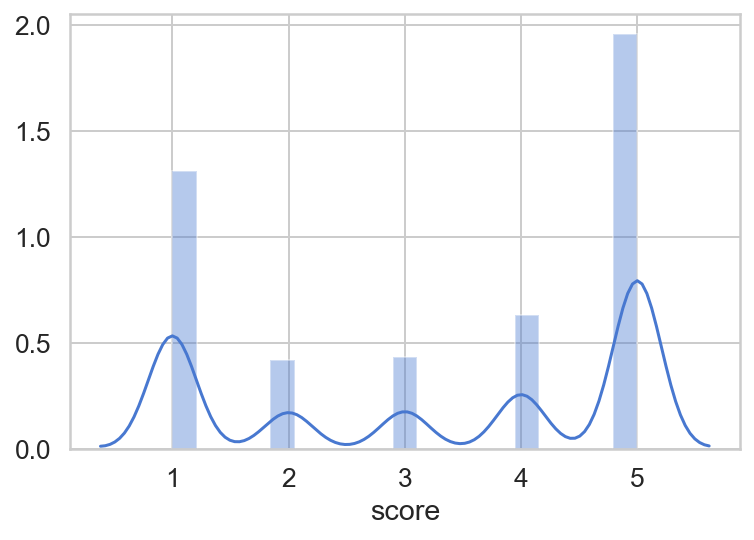

In [59]:
reply_content_counts = df1['score']
sns.distplot(reply_content_counts)

In [60]:
df1['score'].value_counts(normalize=True)

5    0.41158
1    0.27630
4    0.13280
3    0.09084
2    0.08848
Name: score, dtype: float64

**Majority (~ 41%) scores for replyContent response are 5 star reviews...  rejects hypothesis that this field is in response to poor reviews see examples below, but also gives insight that responses also occur for most negative comments as well (21%)**

In [61]:
df1.head()

userName                                            content  score  \
0      Nathan T.  Not sure why the low reviews. But this is a re...      5   
1  Sarah O'Brien  I signed up for the yearly service, which was ...      1   
2   crissy verce  This app is actually causing more stress. I've...      1   
3      Glenneroo  Can't even try the app without creating a logi...      1   
4            E A  I love this app, but what I don't love is the ...      1   

   thumbsUpCount reviewCreatedVersion                  at replyContent  \
0             58                 4.29 2020-07-07 21:05:20          n/a   
1            315                 4.29 2020-07-06 20:35:19          n/a   
2             70                 4.29 2020-07-08 00:27:42          n/a   
3             11                 4.29 2020-07-07 19:32:31          n/a   
4              0                 4.29 2020-07-09 04:48:11          n/a   

  repliedAt       application  replied  
0         _  com.calm.android    False  
1         _  com.calm.android    False  
2         _  com.calm.android    False  
3         _  com.calm.android    False  
4         _  com.calm.android    False

In [ ]:
#pd.set_option('display.max_colwidth', -1)

userImage - can drop - not relevant to this work

# Explore

### Comparing Apps in Terms of Ratings:

In [64]:
import warnings
warnings.filterwarnings('ignore')

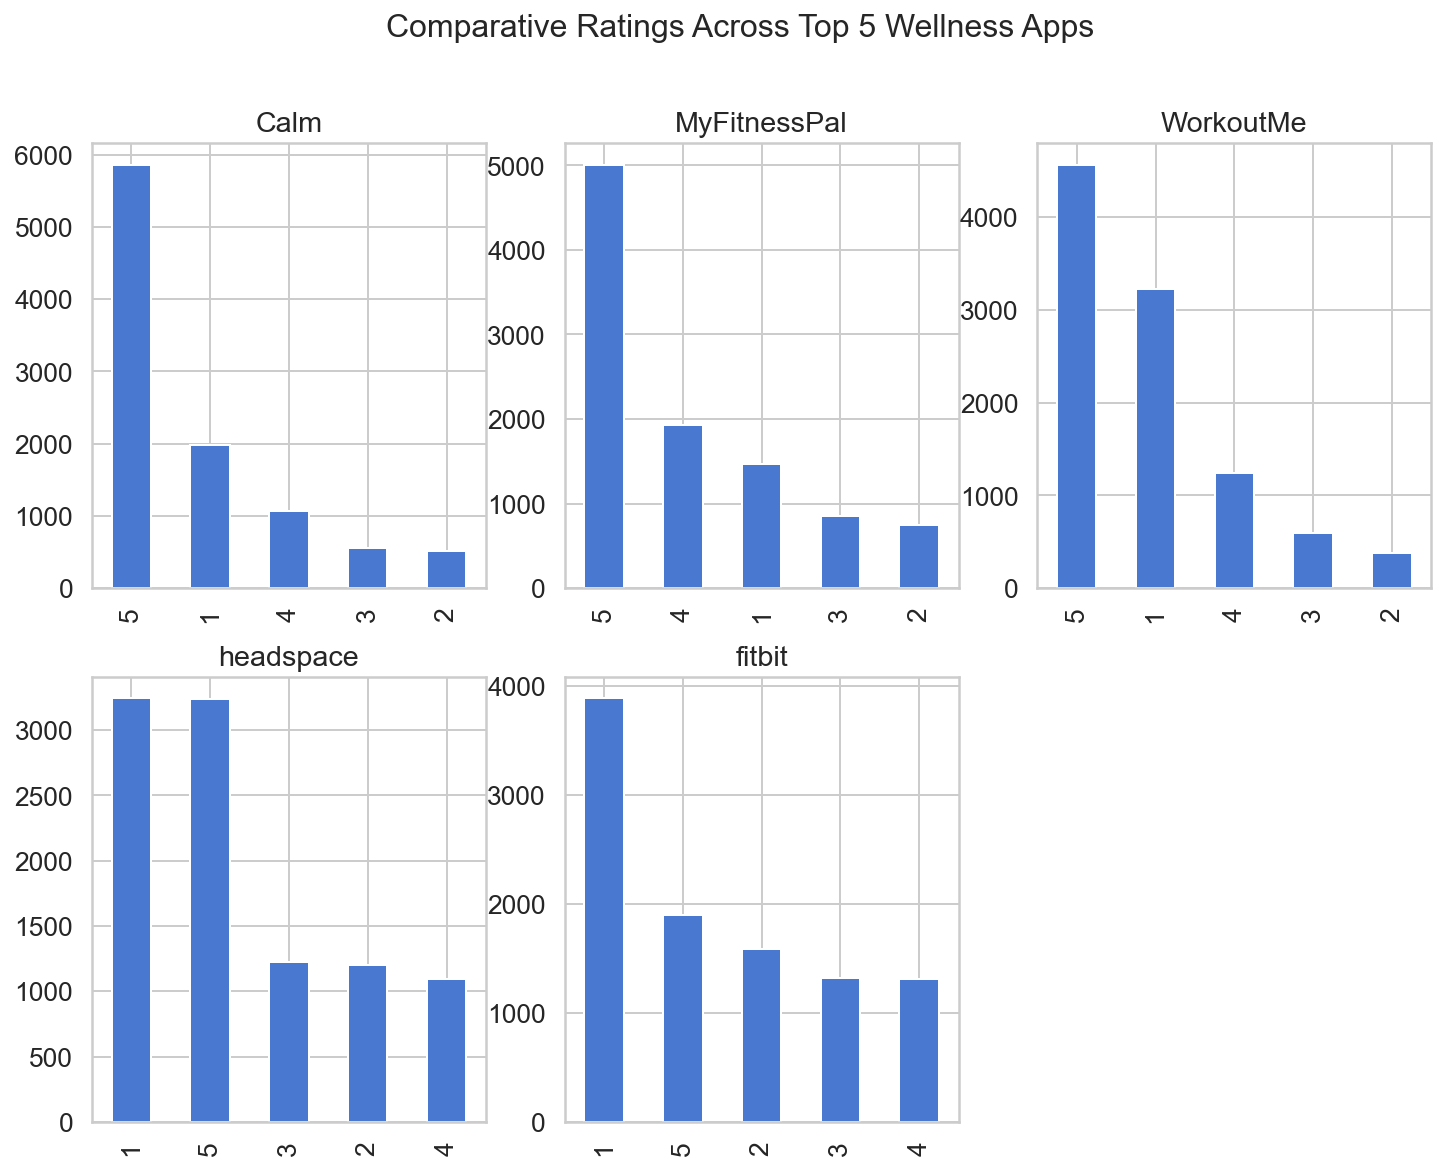

In [65]:
#comparing each app in terms of ratings(need to clean code see subsequent cells)
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(12,9))
calm_df['score'].value_counts().plot(kind='bar',ax=axs[0][0], title='Calm', x='stars', y='# of ratings')
fitpal_df['score'].value_counts().plot(kind='bar', ax=axs[0][1], title='MyFitnessPal')
me_df['score'].value_counts().plot(kind='bar', ax=axs[0][2], title='WorkoutMe')
headspace_df['score'].value_counts().plot(kind='bar', ax=axs[1][0], title='headspace')
fitbit_df['score'].value_counts().plot(kind='bar', ax=axs[1][1], title='fitbit')
fig.delaxes(ax=axs[1][2])
ax.get_subplotspec().rowspan.start
ax.set_xlabel(format_title('Number of Stars'))
ax.set_ylabel('Number of Occurances')
fig.suptitle('Comparative Ratings Across Top 5 Wellness Apps', fontsize=16)
plt.show()


**Observation:** Interesting comparing mediations... Calm as more than 2X 5 star ratings and headspace has almost equal 1* and 5* ratings!?! Fitbit has a majority count of 1* ratings?? AND is among top grossing apps? need to look at timestamps/versions....(and up my coding game to better document and not look so noobie)

In [ ]:
#trying to simplify code..and failing
# list_of_dfs = [calm_df, fitpal_df, me_df, headspace_df, fitbit_df]
# for df in list_of_dfs:
#     df['score'].value_counts().plot(kind='bar')

In [ ]:
# fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(12,9))
# for df in list_of_dfs:
#     df['score'].value_counts().plot(kind='bar',title='df')
#     fig.delaxes(ax=axs[1][2])
#     ax.get_subplotspec().rowspan.start
#     fig.suptitle('Comparative Ratings Across Top 5 Wellness Apps', fontsize=16)

### Versions

In [66]:
#looking for various app versions to perhaps evauluate ratings based on version improvements? 
#245 versions between the 5 apps
app_reviews_df['reviewCreatedVersion'].value_counts()

.          4702
3.21       1905
20.7.0     1839
20.11.1    1408
20.10.0    1307
           ... 
2.1.0         1
4.12          1
3.0           1
2.4.2         1
4.0.2         1
Name: reviewCreatedVersion, Length: 249, dtype: int64

Comparing highest rated and lowest rated fitness-baesd apps by version count:

In [67]:
#Isolating myfitnesspal app to see how many versions: 15 
app_reviews_df.groupby('application').get_group('com.myfitnesspal.android')['reviewCreatedVersion'].value_counts()

20.7.0     1839
20.11.1    1408
20.10.0    1307
20.6.1     1160
20.9.0     1157
20.2.1      941
20.1.0      667
20.6.0      448
20.5.0      403
20.3.0      274
20.4.1      151
20.11.0     126
20.12.0      99
20.8.0       16
20.4.0        4
Name: reviewCreatedVersion, dtype: int64

In [69]:
app_reviews_df.groupby('application').get_group('com.fitbit.FitbitMobile')['reviewCreatedVersion'].value_counts()

3.21      1905
3.23      1165
3.24      1067
3.20       918
3.19.1     787
3.22.1     769
3.19.2     751
3.18       663
3.13       492
3.14       403
3.16       349
3.17       273
3.15       226
3.4.2      153
3.22        47
3.25        25
3.19         7
Name: reviewCreatedVersion, dtype: int64

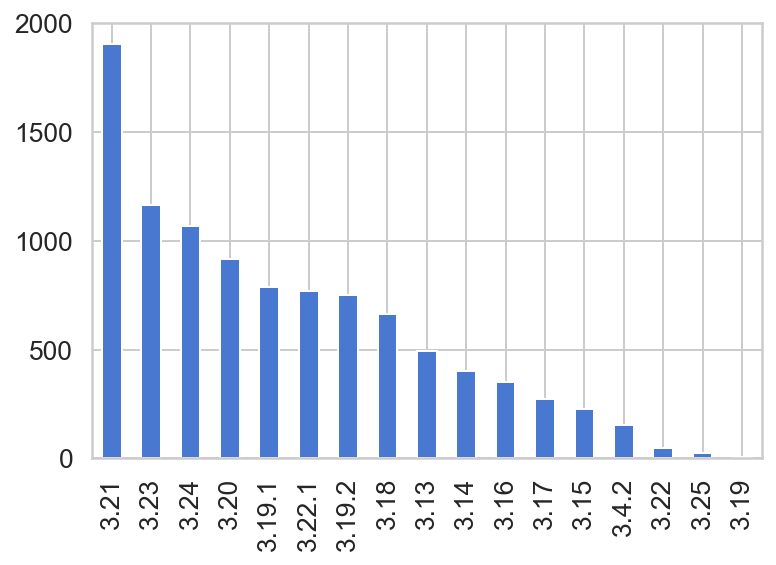

In [86]:
#Isolating fitbit app to see how many versions: 17 
app_version_fitbit = app_reviews_df.groupby('application').get_group('com.fitbit.FitbitMobile')['reviewCreatedVersion'].value_counts()
app_version_fitbit.plot(kind='bar')

In [ ]:
#!pip install interact


In [70]:
# Clean this up to look at versions...
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [71]:
@interact(x=list(app_reviews_df['application'].unique()))
def plt_compare(x):
    fig = plt.figure(figsize=(10,8))
    count = len(app_reviews_df.groupby('application').get_group(x)['reviewCreatedVersion'].unique())
    app_reviews_df.groupby('application').get_group(x)['reviewCreatedVersion'].hist(bins='auto')
    plt.xlabel('Version')
    plt.ylabel('Number of Reviews')
    plt.xticks(rotation=45, fontsize=6) 
    print(f'Version Count : {count}')

interactive(children=(Dropdown(description='x', options=('com.calm.android', 'com.myfitnesspal.android', 'com.…

In [118]:
import plotly.express as px

# WHY does this look funny?

In [131]:
px.scatter_3d(df, x='application', y='score',z='reviewCreatedVersion')

## Whats in a review?

In [72]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords_list = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aosika\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [183]:
#creating a df to 'clean' the content 
clean_df = df.copy()

In [ ]:
# clean_df['content'] = clean_df['content'].apply(lambda x: ' '.join([w.lower() for w in w.split() if w not in (stopwords_list)]))

# clean_df['content']

In [165]:
def clean_freq(text):
    '''A pre-processing function that cleans text of stopwords, punctuation and capitalization, tokenizes, lemmatizes
    then finds the most frequently used 100 words
    
    text - the text to be cleaned in string format'''

    # Get all the stop words in the English language
    from nltk.corpus import stopwords
    #importing additional functions to execute
    import string
    from nltk import FreqDist
    #importing and enstantiating lemmatizer 
    
    lemmatizer = nltk.stem.WordNetLemmatizer()
    
    stopwords_list = stopwords.words('english')

    #remove punctuation
    stopwords_list += list(string.punctuation)
    ##adding adhoc all strings that don't appear to contribute, added 'article, page and wikipedia' iteratively as 
    ##these are parts of most comment strings
    stopwords_list += ("''","``", "'s", "\\n\\n" , '...', 'i\\','\\n',
                       '•', "i", 'the', "'m", 'i\\', "'ve", "don\\'t",
                      "'re", "\\n\\ni", "it\\", "'ll", 'you\\', "'d", "n't",
                      '’', 'app') 
    
    from nltk import word_tokenize
    tokens = word_tokenize(text)
    lemma_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    stopped_tokens = [w.lower() for w in lemma_tokens if w.lower() not in stopwords_list]
    freqdist = FreqDist(stopped_tokens)
    most_common_stopped = freqdist.most_common(100)
    return most_common_stopped

In [169]:
def clean_tokens(text):
    '''A pre-processing function that cleans text of stopwords, punctuation and capitalization, tokenizes, lemmatizes
    then finds the most frequently used 100 words
    
    text - the text to be cleaned in string format'''

    # Get all the stop words in the English language
    from nltk.corpus import stopwords
    #importing additional functions to execute
    import string
    from nltk import FreqDist
    #importing and enstantiating lemmatizer 
    
    lemmatizer = nltk.stem.WordNetLemmatizer()
    
    stopwords_list = stopwords.words('english')

    #remove punctuation
    stopwords_list += list(string.punctuation)
    ##adding adhoc all strings that don't appear to contribute, added 'article, page and wikipedia' iteratively as 
    ##these are parts of most comment strings
    stopwords_list += ("''","``", "n't", 'app') 
  
    
    from nltk import word_tokenize
    tokens = word_tokenize(text)
    lemma_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    stopped_tokens = [w.lower() for w in lemma_tokens if w.lower() not in stopwords_list]
    return stopped_tokens

In [76]:
from wordcloud import WordCloud

In [77]:
text = str(list(clean_df['content']))

In [166]:
freq_clean = clean_freq(text)
#removed the word app, as it is obvious and was most frequent by 6X the next most freqent word (36901 cases)

In [167]:
freq_clean

[('wa', 7763),
 ('free', 7394),
 ('use', 7294),
 ('time', 7209),
 ('love', 6786),
 ('day', 6717),
 ('get', 6515),
 ('like', 6340),
 ('ha', 6332),
 ('really', 6184),
 ('sleep', 6139),
 ('great', 6059),
 ('fitbit', 5905),
 ('meditation', 5809),
 ('help', 5473),
 ('good', 5312),
 ('would', 5244),
 ('work', 5149),
 ('even', 4655),
 ('keep', 3984),
 ('one', 3955),
 ('pay', 3912),
 ('subscription', 3856),
 ('doe', 3739),
 ('year', 3677),
 ('sync', 3675),
 ('food', 3641),
 ('update', 3561),
 ('calm', 3410),
 ('phone', 3367),
 ('track', 3353),
 ('much', 3336),
 ('ca', 3281),
 ('need', 3174),
 ('calorie', 3064),
 ('also', 3058),
 ('using', 3047),
 ('want', 3020),
 ('issue', 3020),
 ('thing', 2928),
 ('every', 2915),
 ('money', 2914),
 ('make', 2900),
 ('trial', 2804),
 ('easy', 2775),
 ('way', 2767),
 ('try', 2739),
 ('used', 2727),
 ('still', 2726),
 ('tried', 2611),
 ('could', 2536),
 ('premium', 2451),
 ('month', 2450),
 ('exercise', 2403),
 ('find', 2373),
 ('well', 2353),
 ('option', 2321)

In [170]:
clean_toks = clean_tokens(text)

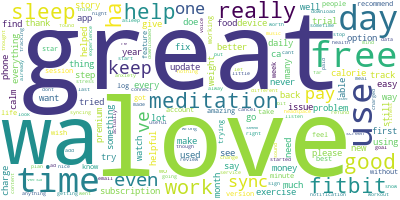

In [171]:

wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, collocations=False, contour_color='red')

wordcloud.generate(','.join(clean_toks))

wordcloud.to_image()


In [83]:
#words associated with each rating?


In [ ]:
##do I remove punctuation? ! could mean something... maybe just take out .?

In [172]:
def clean_comment(comment):
    '''Lemmatizes, removes capitalization, punctuation and 'stopwords' from the lemmatized tokens,
    returns data in the dataframe for modeling in a "clean" state
    
    comment - a text string'''
    
    import string
    #splitting sentences into tokens
    tokens = comment.split()
    
    #instantiating Lemmatizer and lemmatizing words
    lemmatizer = nltk.stem.WordNetLemmatizer()
    lemma_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    stopwords_list = stopwords.words('english')
    stopwords_list += ("''","``", ".", 'app') 

    #remove punctuation, capitalization, and stopwords
    stopwords_list += list(string.punctuation)
    stopped_tokens = [w.lower() for w in lemma_tokens if w.lower() not in stopwords_list]
    
    return ' '.join(stopped_tokens)



In [184]:
clean_df['content'] = clean_df['content'].apply(clean_tokens)

clean_df['content']

0        [sure, low, review, really, good, around, 's, ...
1        [signed, yearly, service, wa, supposed, charge...
2        [actually, causing, stress, 've, subscribed, p...
3        [ca, even, try, without, creating, login, insi...
4        [love, love, fact, signed, 7, day, free, trial...
                               ...                        
49995        [help, stay, track, walk, n, exercise, daily]
49996                                   [wo, sync, fitbit]
49997                             [love, beneficial, life]
49998    [go, connect, versa, searching, screen, doesnt...
49999    [unreliable, factory, reset, uninstall/reinsta...
Name: content, Length: 50000, dtype: object

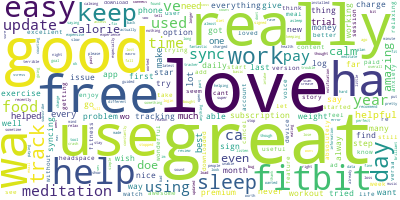

In [185]:
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, collocations=False, contour_color='steelblue')

wordcloud.generate(clean_df['content'].to_string())

wordcloud.to_image()

In [ ]:
import timestamp

going to look at timespan, 

In [93]:
import plotly.express as px

In [94]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [95]:
plt.style.use('seaborn-notebook')

# Model

Using the 'clean_df' content to model since it's been lemmatized, and stopwords have been removed, including 'app' which was used 6X more than any other word.

In [96]:
from sklearn.model_selection import train_test_split

In [186]:
clean_df.head()

userName                                            content  score  \
0      Nathan T.  [sure, low, review, really, good, around, 's, ...      5   
1  Sarah O'Brien  [signed, yearly, service, wa, supposed, charge...      1   
2   crissy verce  [actually, causing, stress, 've, subscribed, p...      1   
3      Glenneroo  [ca, even, try, without, creating, login, insi...      1   
4            E A  [love, love, fact, signed, 7, day, free, trial...      1   

   thumbsUpCount reviewCreatedVersion                  at replyContent  \
0             58                 4.29 2020-07-07 21:05:20          n/a   
1            315                 4.29 2020-07-06 20:35:19          n/a   
2             70                 4.29 2020-07-08 00:27:42          n/a   
3             11                 4.29 2020-07-07 19:32:31          n/a   
4              0                 4.29 2020-07-09 04:48:11          n/a   

  repliedAt       application  replied  
0         _  com.calm.android    False  
1         _  com.calm.android    False  
2         _  com.calm.android    False  
3         _  com.calm.android    False  
4         _  com.calm.android    False

## Preprocessing

In [187]:
stars_dict = {5:'good', 4:'neutral', 3: 'neutral', 2:'neutral', 1:'bad'}
clean_df['Target'] = clean_df['score'].map(stars_dict)

In [206]:
#!pip install yellowbrick

In [207]:
import yellowbrick

In [215]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

clean_content = clean_df['content'].apply(lambda x: ' '.join(x))

tfidf = TfidfVectorizer()

X = tfidf.fit_transform(clean_content)

tf_words = tfidf.get_feature_names()

In [218]:
len(tfidf.vocabulary_)

20356

In [219]:

model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(X)
visualizer.show()

KeyboardInterrupt: 

https://medium.com/@rohithramesh1991/unsupervised-text-clustering-using-natural-language-processing-nlp-1a8bc18b048d

In [217]:
import sklearn.metrics as metrics

ks = range (1,12)
inertia = []


for k in ks:
    model1 = KMeans(n_clusters=k)
    model1.fit(X)
    inertia.append(model.inertia_)
    
plt.plot(ks, inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

KeyboardInterrupt: 

### Baseline Values: 

In [188]:
clean_df['Target'].value_counts(dropna=True, normalize=True)

good       0.41158
neutral    0.31212
bad        0.27630
Name: Target, dtype: float64

In [189]:
#pulling the strings back together
clean_df['content'].apply(lambda x: ' '.join(x))

0        sure low review really good around 's entirely...
1        signed yearly service wa supposed charged end ...
2        actually causing stress 've subscribed premium...
3        ca even try without creating login inside feat...
4        love love fact signed 7 day free trial nothing...
                               ...                        
49995                help stay track walk n exercise daily
49996                                       wo sync fitbit
49997                                 love beneficial life
49998    go connect versa searching screen doesnt even ...
49999    unreliable factory reset uninstall/reinstall o...
Name: content, Length: 50000, dtype: object

In [190]:
X = clean_df['content'].apply(lambda x: ' '.join(x))
y = clean_df['Target']

In [102]:
from sklearn.model_selection import train_test_split

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=8)

In [192]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

## Various Classification Models, Multi NB, LinearSVC, LogReg

https://medium.com/syncedreview/applying-multinomial-naive-bayes-to-nlp-problems-a-practical-explanation-4f5271768ebf

 Laplace smoothing , which is a technique for smoothing categorical data. A small-sample correction, or pseudo-count, will be incorporated in every probability estimate. Consequently, no probability will be zero. this is a way of regularizing Naive Bayes, and when the pseudo-count is zero, it is called Laplace smoothing. While in the general case it is often called Lidstone smoothing.

In [200]:
nb = Pipeline([('tfidf', TfidfVectorizer()),
               ('clf', MultinomialNB(alpha=6)),
              ])
nb.fit(X_train, y_train)


from sklearn.metrics import classification_report, accuracy_score
y_pred = nb.predict(X_test)

print('Accracy Score: %s' % round(accuracy_score(y_pred, y_test),2))
print(classification_report(y_test, y_pred))


Accracy Score: 0.73
              precision    recall  f1-score   support

         bad       0.76      0.70      0.73      4081
        good       0.76      0.93      0.84      6211
     neutral       0.63      0.50      0.56      4708

    accuracy                           0.73     15000
   macro avg       0.72      0.71      0.71     15000
weighted avg       0.72      0.73      0.72     15000



In [202]:
scaler = nb.named_steps['tfidf']
classifier = nb.named_steps['clf']



In [203]:
classifier.coef_

array([[ -8.74622722,  -9.48616486, -10.00203136, ..., -10.05352604,
        -10.05352604, -10.05352604],
       [ -9.84483124,  -9.46751333, -10.10332359, ..., -10.06341803,
        -10.06341803, -10.06341803],
       [ -9.42185105,  -9.683042  , -10.07733846, ..., -10.07733846,
        -10.07733846, -10.07733846]])

# Remember to run this to get feature names

In [ ]:
scaler.get_feature_names()

theorized that the best model for nlp is Linear Support Vector Machine..
https://scikit-learn.org/stable/modules/svm.html#svm-kernels

In [159]:
from sklearn.svm import LinearSVC

lSVC = Pipeline([('tfidf', TfidfVectorizer()),
                ('clf', LinearSVC(dual=False, random_state=42, max_iter=5)),
               ])
lSVC.fit(X_train, y_train)


y_pred = lSVM.predict(X_test)

print('Accracy Score: %s' % round(accuracy_score(y_pred, y_test),2))
print(classification_report(y_test, y_pred))


TypeError: __init__() got an unexpected keyword argument 'stopwords'

In [ ]:
lSVC.

In [106]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('tfidf', TfidfVectorizer()),
                ('clf', SGDClassifier(loss='modified_huber', penalty='l2',alpha=.001, random_state=42, max_iter=6, tol=None)),
               ])
sgd.fit(X_train, y_train)


y_pred = sgd.predict(X_test)

print('Accracy Score: %s' % round(accuracy_score(y_pred, y_test),2))
print(classification_report(y_test, y_pred))


Accracy Score: 0.75
              precision    recall  f1-score   support

         bad       0.72      0.80      0.76      4081
        good       0.80      0.91      0.85      6211
     neutral       0.68      0.50      0.57      4708

    accuracy                           0.75     15000
   macro avg       0.73      0.73      0.73     15000
weighted avg       0.74      0.75      0.74     15000



AttributeError: 'Pipeline' object has no attribute 'coef_'

In [134]:
X_train.describe()

count     35000
unique    33579
top        good
freq        262
Name: content, dtype: object

In [139]:
X_train.isnull().sum()

0

In [136]:
y_train.describe()

count     35000
unique        3
top        good
freq      14368
Name: Target, dtype: object

In [137]:
y_train.isna().sum()

0

In [107]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('tfidf', TfidfVectorizer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5))])
logreg.fit(X_train, y_train)


y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.715
              precision    recall  f1-score   support

         bad       0.71      0.72      0.72      4081
        good       0.80      0.84      0.82      6211
     neutral       0.58      0.55      0.56      4708

    accuracy                           0.71     15000
   macro avg       0.70      0.70      0.70     15000
weighted avg       0.71      0.71      0.71     15000



In [ ]:
stop

# CLUSTERING:

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
userName                50000 non-null object
content                 50000 non-null object
score                   50000 non-null int64
thumbsUpCount           50000 non-null int64
reviewCreatedVersion    50000 non-null object
at                      50000 non-null datetime64[ns]
replyContent            50000 non-null object
repliedAt               50000 non-null object
application             50000 non-null object
replied                 50000 non-null bool
dtypes: bool(1), datetime64[ns](1), int64(2), object(6)
memory usage: 3.5+ MB


In [115]:
df['replied'].astype(int)

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: replied, Length: 50000, dtype: int32

In [ ]:
dfpca = 

In [ ]:
df.head()

In [ ]:
app_packages

In [ ]:
#create categorical data columns:
cat_cols = df.select_dtypes('O').columns

In [ ]:
display(cat_cols)

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
numcols = df.select_dtypes('')

In [ ]:
df['at'] = df['at'].astype('str')

In [ ]:
df.info()

In [ ]:
df['repliedAt'].astype('str')
df['repliedAt']

In [ ]:
df['repliedAt'].value_counts()

In [ ]:
df.info()

In [ ]:
df.info()

In [ ]:
#Label Encode and save for inverse_transform

#create a dictionary
encoders = {}

for col in cat_cols:
    #Instanciate labelencoder
    encoders[col] = LabelEncoder()
    #encode the categorical data
    df[col] = encoders[col].fit_transform(df[col])

df(cat_cols)

In [ ]:
col_nans = df.isna().sum(axis=0)
col_nans

In [ ]:
df1 = app_reviews_df.copy()

In [ ]:
df1.head()